# Monetary Aggregates Data Tutorial

In this tutorial we will download monetary aggregate data from Federal Reserve Economic Data (FRED).  The FRED database contains frequently updated macro data from various sources---most of which are US government agencies.  You can peruse data on their website (https://fred.stlouisfed.org/) and search for specific data series.  However, in this tutorial I'll show how to access data from their servers directly using an API (application programming interface).  

Let's work within Python and use the package `fredapi`  (https://fred.stlouisfed.org/docs/api/fred/) which makes use of `pandas` and returns FRED data to you in a `DataFrame`.  A `DataFrame` is a structure that contains two-dimensional data and its corresponding labels.  So basically a table.  You can see how to work with `DataFrame` here: https://realpython.com/pandas-dataframe/.  Playing with `DataFrame` is only useful after you successfully pull the data from FRED and want to view/query/manipulate the resulting table of data.

From a Python terminal (in VSCode, Jupyter, etc.) run:

```python
pip install fredapi
```

This installs the necessary Python package to contact the FRED servers directly and download data.  

According to the Federal Reserve of the US the **money supply** is the total amount of money--cash, coins and balances in bank account--in circulation.  There are several different **monetary aggregates** which measure the money supply.  These monetary aggregates categorize difference assets based on their liquidity.
- Monetary aggregate M0 is currency held by the non-bank public.
- The **monetary base**, or **MB**, is the sum of M0 and reserve balances, or deposits held by banks and other depository institutions in their accounts at the Federal Reserve.  
- Monetary aggregate **M1** is the sum of M0 and deposits, other checkable deposits (OCDs), and savings deposits (including money market deposit accounts).  Deposits include balances held in checking accounts and other highly liquid deposits used for transactions.  It measures currency held outside of the U.S. Treasury, Federal Reserve Banks, and the vaults of depository institutions.  
- Monetary aggregate **M2** is the sum of M1 and small-denomination time deposits (less than \$100,000) and retail money market mutual funds.
- Monetary aggregate **M3** is the sum of M2 and large-denomination time deposits (greater than \$100,000), balances in institutional money market mutual funds, repos issued by depository institutions, and Eurodollars held by US residents at foreign branches of US banks.

Data on the monetary aggregates are released every month in the Federal Reserve's H.6statistical release, <a href="https://www.federalreserve.gov/releases/h6/current/default.htm" target="_blank">Money Stock Measures</a>. 

## Pulling data

First, get an API key from FRED (https://fred.stlouisfed.org/docs/api/api_key.html). This allows you to access `fredapi` to pull data.  One you have your API key, create a new Python code file (in VSCode, Jupyter, etc) use this code to pass the API key directly to FRED.

In [1]:
from fredapi import Fred

fred = Fred(api_key='insert api key here')

You can always search for data series on the FRED website https://fred.stlouisfed.org/, but sometimes it is more convenient to search programmatically. `fredapi` provides a `search()` method that does a full-text search and returns a `DataFrame` of results.  For example, suppose that we want to download US GDP data.  Use the search function to find the name of the series:

In [2]:
from fredapi import Fred
fred = Fred(api_key='9c70445138df124be4928605b7e08bd4')
fred.search('monetary aggregate')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
M2SL,M2SL,2025-10-23,2025-10-23,M2,1959-01-01,2025-08-01,Monthly,M,Billions of Dollars,Bil. of $,Seasonally Adjusted,SA,2025-09-23 12:00:50-05:00,98,announcements (https://www.federalreserve.gov/...
WM2NS,WM2NS,2025-10-23,2025-10-23,M2,1980-11-03,2025-09-01,"Weekly, Ending Monday",W,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2025-09-23 12:00:59-05:00,88,announcements (https://www.federalreserve.gov/...
M2NS,M2NS,2025-10-23,2025-10-23,M2,1959-01-01,2025-08-01,Monthly,M,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2025-09-23 12:00:49-05:00,64,announcements (https://www.federalreserve.gov/...
M1SL,M1SL,2025-10-23,2025-10-23,M1,1959-01-01,2025-08-01,Monthly,M,Billions of Dollars,Bil. of $,Seasonally Adjusted,SA,2025-09-23 12:00:47-05:00,84,announcements (https://www.federalreserve.gov/...
WM1NS,WM1NS,2025-10-23,2025-10-23,M1,1975-01-06,2025-09-01,"Weekly, Ending Monday",W,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2025-09-23 12:00:57-05:00,68,announcements (https://www.federalreserve.gov/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MABMBM01EZQ661S,MABMBM01EZQ661S,2025-10-23,2025-10-23,"Broad Money, Index for the Euro Area (DISCONTI...",1970-01-01,2013-07-01,Quarterly,Q,Index 2010=1,Index 2010=1,Seasonally Adjusted,SA,2014-02-05 08:33:02-06:00,1,OECD descriptor ID: MABMBM01 OECD unit ID: IXO...
MABMBM01EZQ657S,MABMBM01EZQ657S,2025-10-23,2025-10-23,"Broad Money, Index for the Euro Area (DISCONTI...",1970-04-01,2013-07-01,Quarterly,Q,Growth Rate Previous Period,Growth Rate Previous Period,Seasonally Adjusted,SA,2014-02-05 08:33:02-06:00,1,OECD descriptor ID: MABMBM01 OECD unit ID: GPS...
MABMBM01EZA659S,MABMBM01EZA659S,2025-10-23,2025-10-23,"Broad Money, Index for the Euro Area (DISCONTI...",1971-01-01,2012-01-01,Annual,A,Growth Rate Same Period Previous Year,Growth Rate Same Period Previous Yr.,Not Seasonally Adjusted,NSA,2014-02-05 08:33:05-06:00,1,OECD descriptor ID: MABMBM01 OECD unit ID: GYS...


Using the results of the search function, we see that 'M1SL' and 'M2SL' are the series IDs for monetary aggregate M1 and M2.  Let's download data for M0, MB, M1, and M2.  (Note: There are several options for pulling specific vintages of data.  The details can be found here: https://pypi.org/project/fredapi/.)

In [3]:
import pandas as pd
from fredapi import Fred

fred = Fred(api_key='9c70445138df124be4928605b7e08bd4')

# Pull monetary aggregate data from Fred
m0 = fred.get_series('CURRSL')
mb = fred.get_series('BOGMBASE')
m1 = fred.get_series('M1SL')
m2 = fred.get_series('M2SL')

## Describing and visualizing the data

We now have the data series saved variables called `m0, mb, m1, m2`.  There are some useful commands using `DataFrames` that allows you to view your data series.  The `shape` function returns the size of the data set describing the number of rows and number of columns.  The `ndim` function returns the dimension of your data.  If you want to view the series you assigned to the variable `data`, then you can use the `head()` function, which gives the first (default 5) $n$ rows from a `DataFrame`; or you can use `tail()` function to give the last (default 5) $n$ rows from a `DataFrame`. The `describe()` function returns basic statistics: the value count, mean, standard deviation, minimum, maximum, and 25th, 50th, and 75th quantiles for the data in a column.  (NOTE: Running the Python code in a Jupyter notebook has some advantages if you want a pretty view of a `DataFrame`.  This is done in Jupyter's "DataViewer".)

For example, let's view the most recent monthly values for M2:

In [4]:
m0.tail()

2025-04-01    2287.8
2025-05-01    2292.7
2025-06-01    2300.1
2025-07-01    2311.4
2025-08-01    2319.9
dtype: float64

Let's also visualize the data series using the `matplotlib` package.  If it's not already installed, don't forget to do that

```Python
pip install matplotlib
```

You can now use the `.plot()` function to visualize the data.  This function, applied to a `DataFrame` will plot all of the columns with labels.

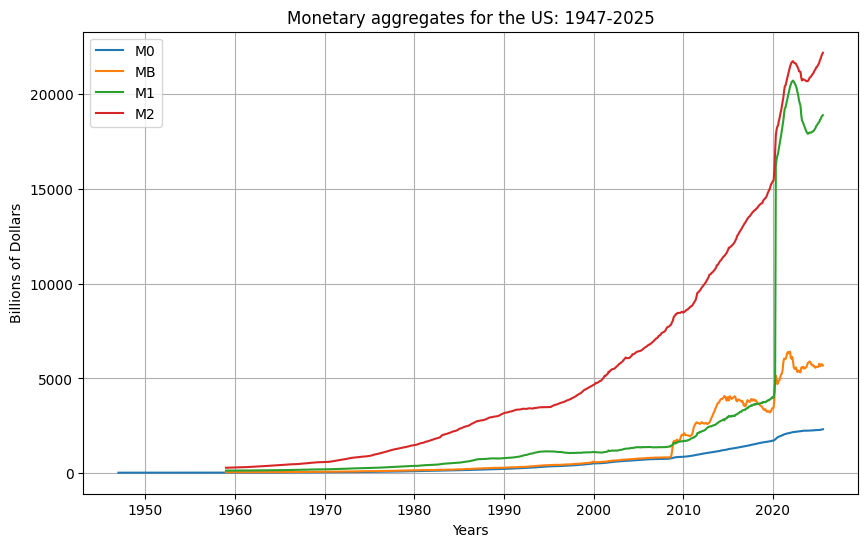

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot monetary aggregates
plt.figure(figsize=(10, 6))
plt.plot(m0, label="M0")
plt.plot(mb, label="MB")
plt.plot(m1, label="M1")
plt.plot(m2, label="M2")

# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Billions of Dollars")
plt.title("Monetary aggregates for the US: 1947-2025")
plt.grid(True)
plt.legend()
plt.show()

There is a striking pattern in the data: M1 jumped up immensely in May 2020.  The reason for this is that the Federal Reserve redefined M1 to include savings deposits in May 2020.  On April 24, 2020 the Federal Reserve announced that Regulation D---a requirement that banks hold reserves against checkable deposits, but not savings or money market accounts---would no longer impose limits on the number of transactions or withdrawals permitted on savings deposit accounts.  <a href="https://www.federalreserve.gov/newsevents/pressreleases/bcreg20200424a.htm" target="_blank">This amendment</a> rendered savings deposits just as liquid as other highly liquid accounts (OCDs) and therefore rightly belong in the definition of M1.  Since May 2020, OCDs and savings deposits are not reported separately but instead reported as their sun under <a href="https://fred.stlouisfed.org/series/MDLNWM" target="_blank">"other liquid deposits"</a>.  

It's also clear that all monetary aggregates have experienced growth over time.  The Federal Reserve has been consistently increasing the money supply.  The growth rate of MB and M1 appeared smooth until the Great Recession, at which point there was a marked rise in both their level and growth rate.  A similar, even more dramatic, increase occurred red during the COVID-19 recession.  

Let's compute the year-over-year growth rate of all monetary aggregates to see if any other patterns emerge.  To do so we will build a very simple `function` in Python which computes the 12 month percentage change in our `DataFrames`.  We then apply the function to each of our monetary aggregate series and plot the results.  (Of course we could easily have computed the percentage change for each series directly, e.g. `m0_yoy=m0.pct_change(periods=12)*100`, but it's a good opportunity to learn how to build a `function`.)

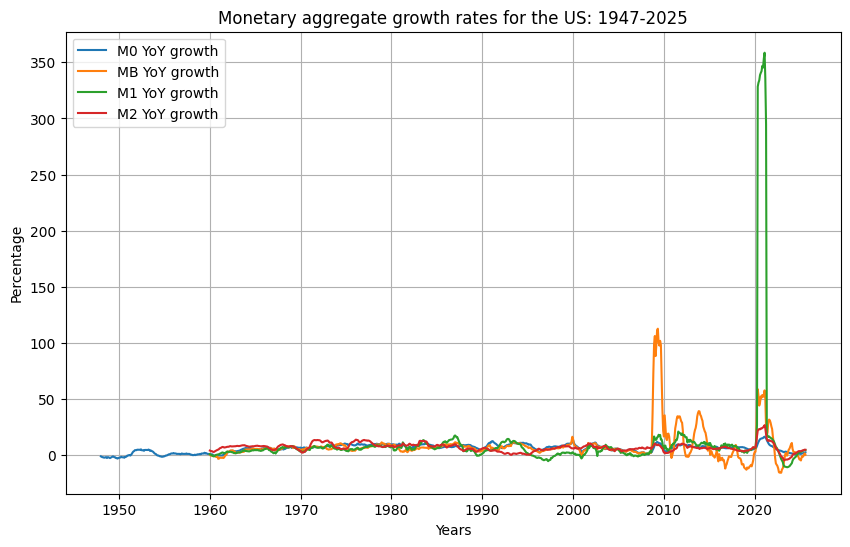

In [6]:
# Create the function to compute the year-over-year growth rate
def calculate_yoy_growth(df):
    # Calculate YoY growth using the value column
    yoy_series = df.pct_change(periods=12) * 100
    return yoy_series

# Apply the function to each series
m0_yoy = calculate_yoy_growth(m0)
mb_yoy = calculate_yoy_growth(mb)
m1_yoy = calculate_yoy_growth(m1)
m2_yoy = calculate_yoy_growth(m2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(m0_yoy, label="M0 YoY growth")
plt.plot(mb_yoy, label="MB YoY growth")
plt.plot(m1_yoy, label="M1 YoY growth")
plt.plot(m2_yoy, label="M2 YoY growth")

# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.title("Monetary aggregate growth rates for the US: 1947-2025")
plt.grid(True)
plt.legend()
plt.show()

This figure validates our earlier observation that money supply growth was very stable up until the Great Recession.  Let's compute the average growth rate for each monetary aggregate from 1970 to 2008:

In [7]:
import pandas as pd
import numpy as np

def average_growth_by_period(df_yoy, start_year, end_year):
    # Filter the data for a specified period
    period = (df_yoy.index.year >= start_year) & (df_yoy.index.year <= end_year)
    # Compute the mean
    return df_yoy[period].mean()

m0_yoy_mean=average_growth_by_period(m0_yoy, 1970, 2008)
mb_yoy_mean=average_growth_by_period(mb_yoy, 1970, 2008)
m1_yoy_mean=average_growth_by_period(m1_yoy, 1970, 2008)
m2_yoy_mean=average_growth_by_period(m2_yoy, 1970, 2008)

print("Average Growth Rates (1970-2008)")
print("=" * 40)
print(f"M0: {m0_yoy_mean:.2f}%")
print(f"MB: {mb_yoy_mean:.2f}%")
print(f"M1: {m1_yoy_mean:.2f}%")
print(f"M2: {m2_yoy_mean:.2f}%")

Average Growth Rates (1970-2008)
M0: 7.64%
MB: 6.92%
M1: 5.25%
M2: 6.95%


Over the period 1970-2008 all monetary aggregates grew somewhere between 5 and 8 percent per year on average.  Now Let's zoom in to get a clearer perspective:

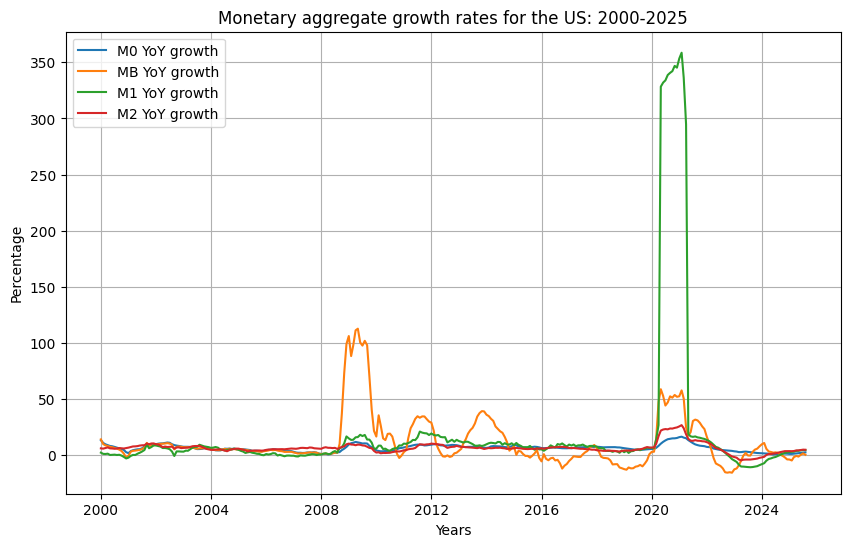

In [8]:
# Plot the yoy growth for a specified period of time
start, end = "2000", "2025"
plt.figure(figsize=(10, 6))
plt.plot(m0_yoy[start:end], label="M0 YoY growth")
plt.plot(mb_yoy[start:end], label="MB YoY growth")
plt.plot(m1_yoy[start:end], label="M1 YoY growth")
plt.plot(m2_yoy[start:end], label="M2 YoY growth")

# Title the figure and label the axis
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.title("Monetary aggregate growth rates for the US: 2000-2025")
plt.grid(True)
plt.legend()
plt.show()

Now we can see that around the Great Recession most of the variability in money supply is from the monetary base.  The reason is that there was a massive injection of reserves to save the financial sector in immediate aftermath of the subprime mortgage crisis.  Since reserves are counted as part of the monetary base, but no other monetary aggregate, we observe much more volatility of this series.  Subsequent actions by the Federal Reserve to manage liquidity via the market for reserves had similar effects on volatility.
